In [38]:
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
#formating the numbers
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
%matplotlib inline  


In [39]:
Anime_df = pd.read_csv("Anime_df_Full_Floats.csv")
Anime_df_Top_500 = Anime_df.head(1000)
Train_Columns = ["Score",
"Scored_By",
"Popularity",
"Members",
"Favorites"]
Train_df = Anime_df[Train_Columns]
Train_df.iloc[:,0:1]

,Score
0,9.15
1,9.09
2,9.09
3,9.09
4,9.06
...,...
5554,6.86
5555,6.86
5556,6.86
5557,6.86


In [40]:
# build our fist linear regression model
m=linear_model.LinearRegression().fit(Train_df.iloc[:,0:1],Train_df.iloc[:,6:7])
m.predict(Train_df.iloc[:,0:1])

ValueError: at least one array or dtype is required

NameError: name 'm' is not defined

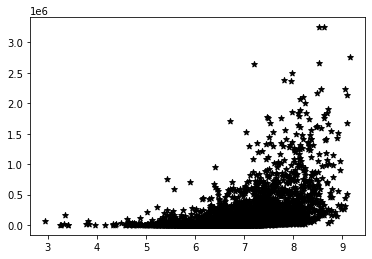

In [41]:
plt.scatter(x=Train_df['Score'],y=Train_df['Members'],c='k',marker='*',label='Digital')
plt.plot(Train_df['Score'],m.predict(Train_df.iloc[:,0:1]),'k',color='blue',linewidth=3)

plt.xlabel('Digital budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

In [42]:
# let's look inside the model
print("b1:",m.coef_)
print("b0:",m.intercept_)

NameError: name 'm' is not defined

In [43]:
df_ID = Anime_df['Anime_Name']
TRAINING_FEATURES = Train_df[Train_df.columns.difference(['Score'])]

TARGET_FEATURE    = 'Score'

X = TRAINING_FEATURES
y = Train_df[TARGET_FEATURE]
# X.info()
Train_df

,Score,Scored_By,Popularity,Members,Favorites
0,9.15,1674539.00,3.00,2753439.00,193718.00
1,9.09,175304.00,339.00,502351.00,13321.00
2,9.09,1142680.00,33.00,1683363.00,47486.00
3,9.09,1131835.00,13.00,2144169.00,164108.00
4,9.06,128247.00,609.00,302846.00,13965.00
...,...,...,...,...,...
5554,6.86,69593.15,15611.00,246.00,1.00
5555,6.86,69593.15,18569.00,45.00,0.00
5556,6.86,69593.15,13668.00,410.00,0.00
5557,6.86,69593.15,12617.00,605.00,1.00


In [44]:
#Pearson
Train_df.corr(method = "pearson").Score.sort_values(ascending = False)

Score         1.00
Members       0.46
Scored_By     0.42
Favorites     0.34
Popularity   -0.31
Name: Score, dtype: float64

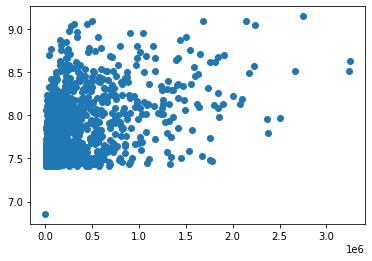

In [45]:
plt.scatter(x=Anime_df_Top_500["Members"] ,y=Anime_df_Top_500["Score"])


In [15]:
Train_df.columns.difference(['Score'])

Index(['Favorites', 'Members', 'Popularity', 'Scored_By'], dtype='object')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape))
print("Number of training samples: #{}".format(X_train.shape))
print("Number of test samples: #{}".format(X_test.shape))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #(5559, 4)
Number of training samples: #(4447, 4)
Number of test samples: #(1112, 4)

Target distribution in original dataset:
6.86    1449
7.21      34
6.54      31
7.02      29
7.16      29
        ... 
4.91       1
4.87       1
4.85       1
4.84       1
2.95       1
Name: Score, Length: 418, dtype: int64

Target distribution in the training set:
6.86    1155
7.21      29
7.27      24
7.16      22
6.67      22
        ... 
9.15       1
4.75       1
9.05       1
5.14       1
8.54       1
Name: Score, Length: 404, dtype: int64

Target distribution in the test set:
6.86    294
6.54     10
6.81      9
6.50      8
6.13      8
       ... 
7.32      1
4.39      1
8.02      1
7.00      1
5.58      1
Name: Score, Length: 299, dtype: int64


In [17]:
model = linear_model.LinearRegression().fit(X_train,y_train)

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([6.6886341 , 6.61282388, 6.72256459, ..., 6.58756098, 6.71700735,
       7.37428593])

In [20]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 7.05728560e-07 -4.15384759e-07 -2.95162840e-05  2.43942091e-06]
Intercept: 6.935021768771713
Mean squared error (MSE): 0.37
Coefficient of determination (R^2): 0.22


In [21]:
r2_score(y_test, y_pred)

0.21832131054745918

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler.mean_

array([  1409.09939285, 102013.94108388,   7337.5149539 ,  68049.72318663])

In [24]:
scaler.scale_

array([  7831.55198391, 252992.35576001,   6035.7267399 , 144268.58216662])

In [25]:
X_trained_scaled = pd.DataFrame(X_trained_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [26]:
np.round(X_trained_scaled.describe(),2)

,Favorites,Members,Popularity,Scored_By
count,4447.00,4447.00,4447.00,4447.00
mean,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.18,-0.40,-1.22,-0.47
25%,-0.18,-0.40,-0.90,-0.45
50%,-0.18,-0.36,-0.32,-0.24
75%,-0.14,-0.08,0.84,0.01
max,24.56,12.43,1.98,15.04


In [27]:
model_scaled = LinearRegression().fit(X_trained_scaled, y_train)

In [28]:
print('Coefficients:', model_scaled.coef_)
print('Intercept:', model_scaled.intercept_)
print('model score is',model_scaled.score(X_trained_scaled,y_train))

Coefficients: [ 0.00552695 -0.10508917 -0.17815222  0.3519318 ]
Intercept: 6.843066916267668
model score is 0.23020002781726


In [29]:
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [30]:
y_pred_scaled

array([6.6886341 , 6.61282388, 6.72256459, ..., 6.58756098, 6.71700735,
       7.37428593])

In [31]:
print('mean squared error on scaled data is ', np.round(mean_squared_error(y_pred_scaled, y_test)),2)
print('r squared on scaled data is ', r2_score(y_pred_scaled, y_test))

mean squared error on scaled data is  0.0 2
r squared on scaled data is  -1.9304149850987513
